# k-means Clustering of Movie Ratings

You want to explore the similarities and differences in the tastes of the people in the movies based on how different movies qualify. Does understanding these ratings contribute to a movie recommendation system for users? The data we will use comes from the wonderful set of qualification data from MovieLens users.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

# Import the Movies dataset
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Import the ratings dataset
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


In [5]:
# Calculate the average rating of romance and scifi movies

genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
userId,,
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [6]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


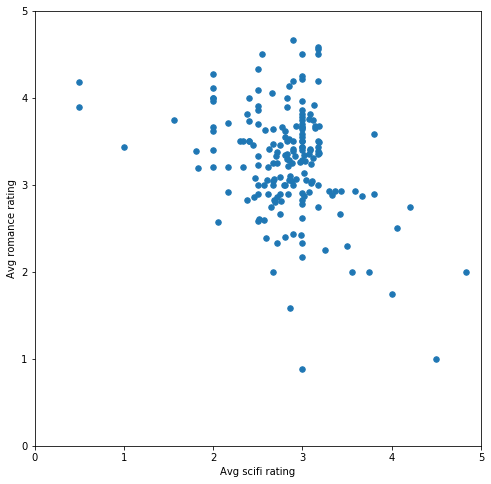

In [7]:
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [8]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

* Import [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* Prepare KMeans with n_clusters = 2
* Pass the dataset **X** to KMeans' fit_predict method and retrieve the clustering labels into *predictions*

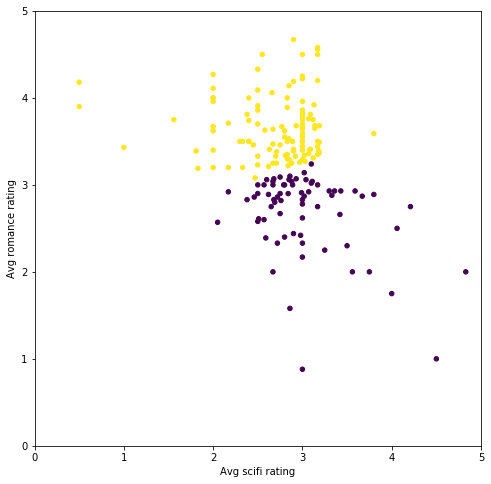

In [9]:
# Import KMeans
from sklearn.cluster import KMeans 

# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions)

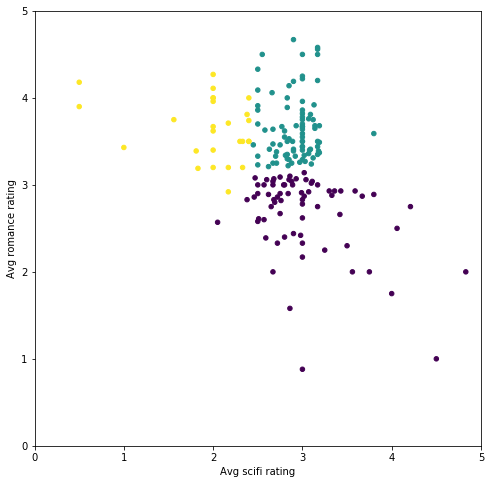

In [10]:
# Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

# use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

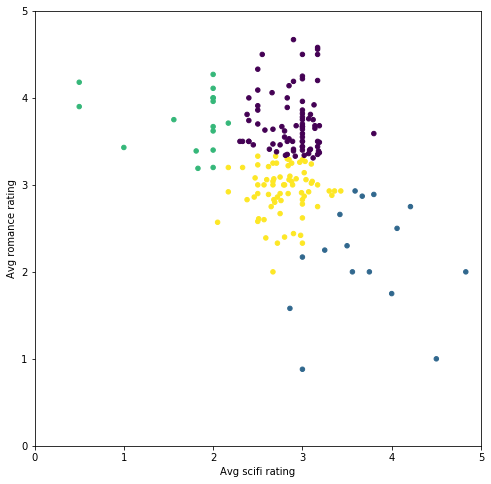

In [11]:
# Create an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters=4)

# use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

## Choosing K

In [12]:
# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)

# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]


In [13]:
# Look at the values of K vs the silhouette score of running K-means with that value of k
list(zip(possible_k_values, errors_per_k))

[(2, 0.35588178764728268),
 (7, 0.38668213231290249),
 (12, 0.3371847418379913),
 (17, 0.35944692223429936),
 (22, 0.36272355197412848),
 (27, 0.36818439836576489),
 (32, 0.36211820146482238),
 (37, 0.36900645513216662),
 (42, 0.36325351795235611),
 (47, 0.38304666344428739),
 (52, 0.36304483731915871),
 (57, 0.34648597528359742),
 (62, 0.35674901182397639),
 (67, 0.36405454665898157),
 (72, 0.338697206462447),
 (77, 0.35283991215444865),
 (82, 0.35278921553423942),
 (87, 0.32794134343560594),
 (92, 0.33160136712062172),
 (97, 0.31487068935675733),
 (102, 0.31582854857678094),
 (107, 0.29627199879583793),
 (112, 0.29645657673600745),
 (117, 0.27046726912632907),
 (122, 0.26287346269634709),
 (127, 0.24278047640161682),
 (132, 0.24633724089612322),
 (137, 0.23726820935357462),
 (142, 0.22400181282905812),
 (147, 0.20232323286847989),
 (152, 0.17898002568642188),
 (157, 0.16590278167856412),
 (162, 0.14665676290123009),
 (167, 0.12820427579529109),
 (172, 0.10075966098920461),
 (177, 0.0

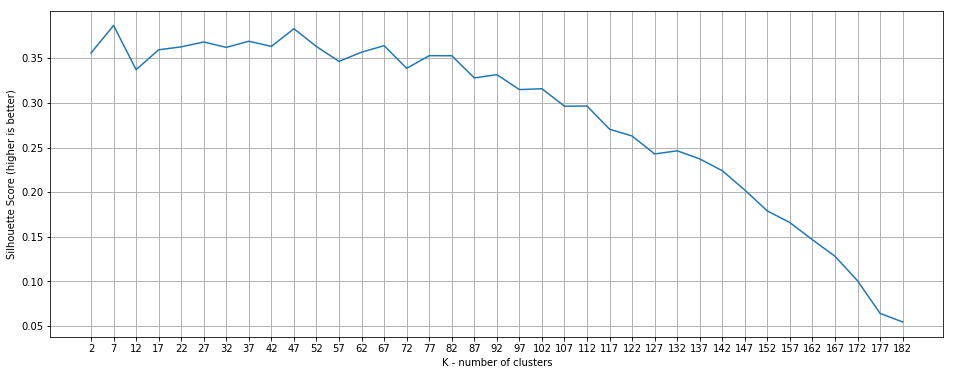

In [14]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Looking at this graph, good choices for k include 7, 22, 27, 32, amongst other values (with a slight variation between different runs). Increasing the number of clusters (k) beyond that range starts to result in worse clusters (according to Silhouette score)

My pick would be k=7 because it's easier to visualize:

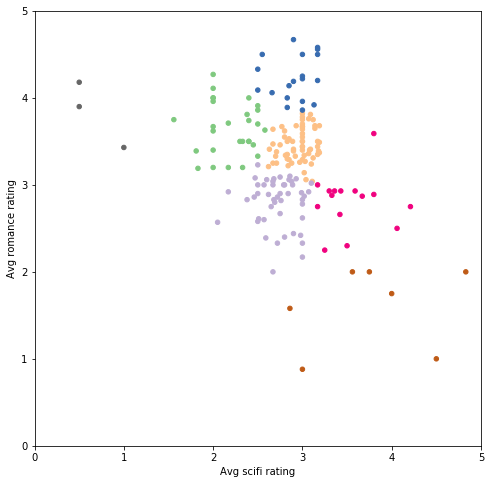

In [15]:
# Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)

# use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent') 


## Throwing some Action into the mix

In [16]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [17]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values

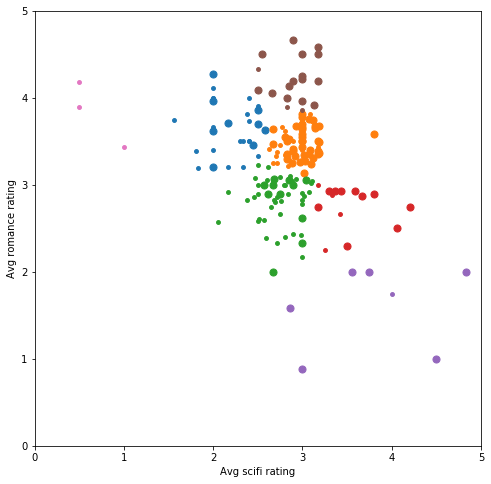

In [32]:
# Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)

# use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

## Movie-level Clustering

In [33]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [34]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0


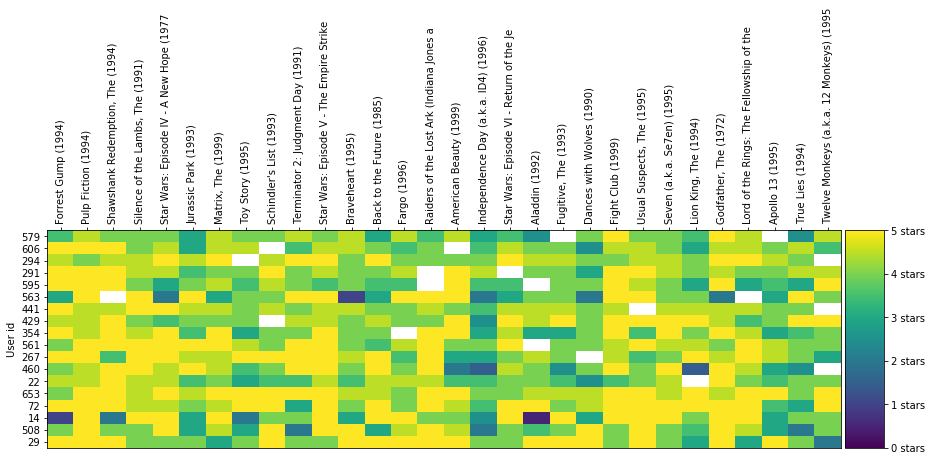

In [35]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [36]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

In [37]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

## Let's cluster!

In [38]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

cluster # 9
# of users in cluster: 254. # of users in plot: 70


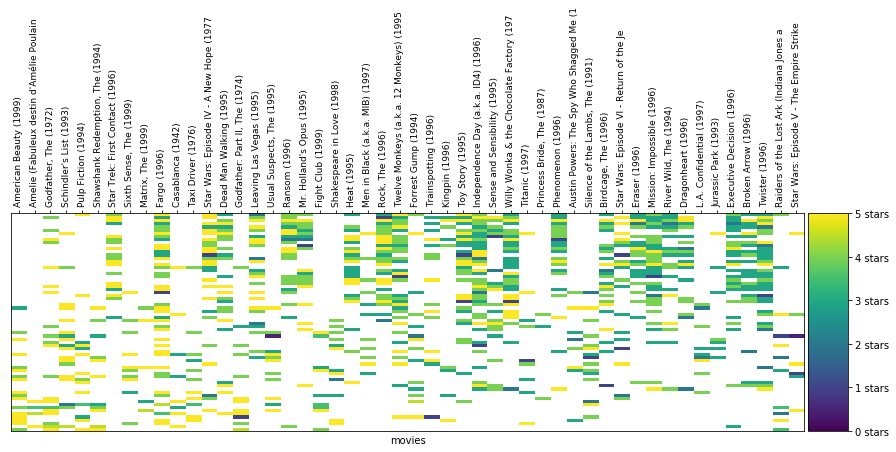

cluster # 19
# of users in cluster: 34. # of users in plot: 34


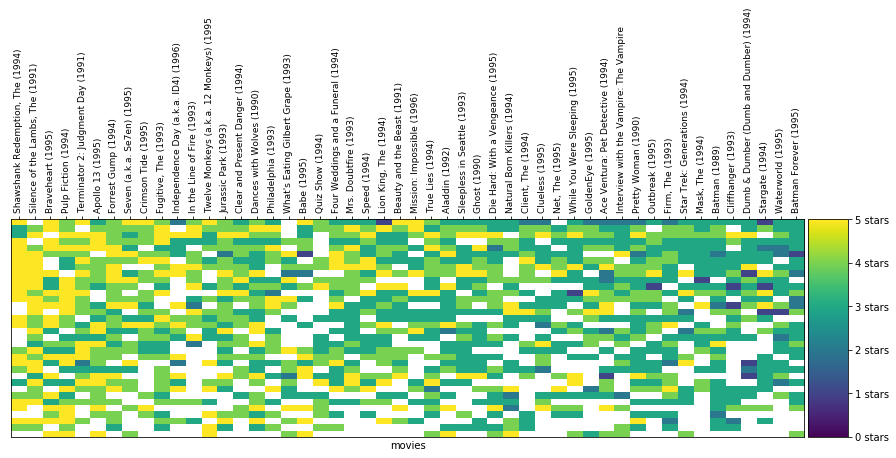

cluster # 11
# of users in cluster: 123. # of users in plot: 70


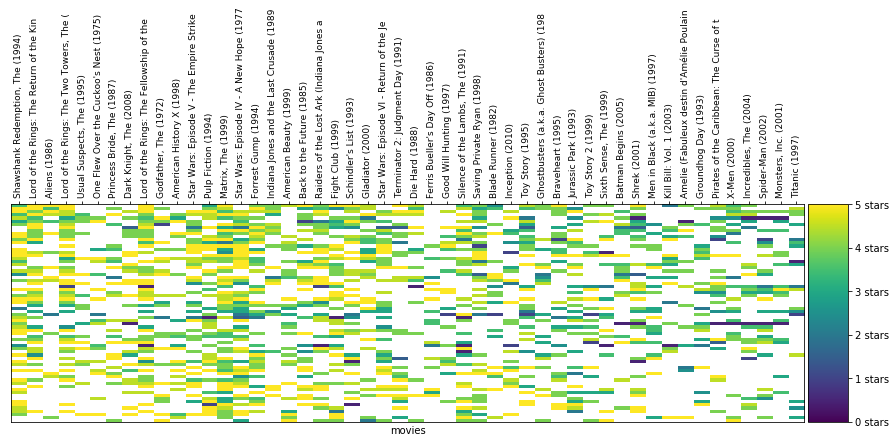

cluster # 6
# of users in cluster: 32. # of users in plot: 32


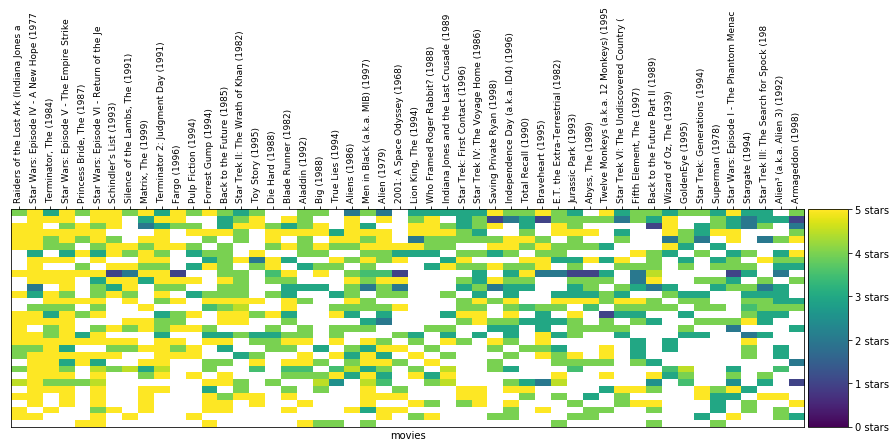

cluster # 2
# of users in cluster: 45. # of users in plot: 45


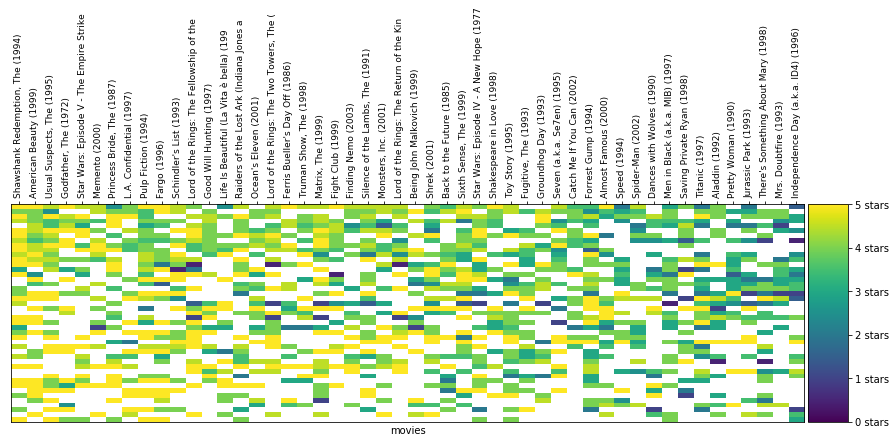

cluster # 8
# of users in cluster: 12. # of users in plot: 12


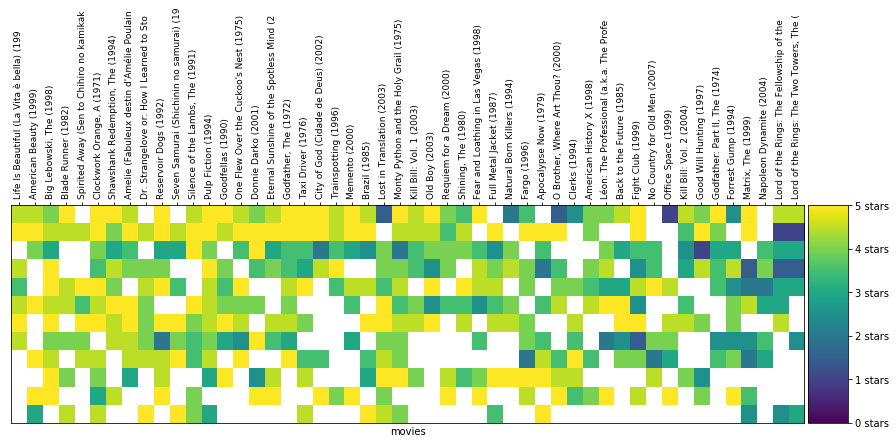

cluster # 12
# of users in cluster: 43. # of users in plot: 43


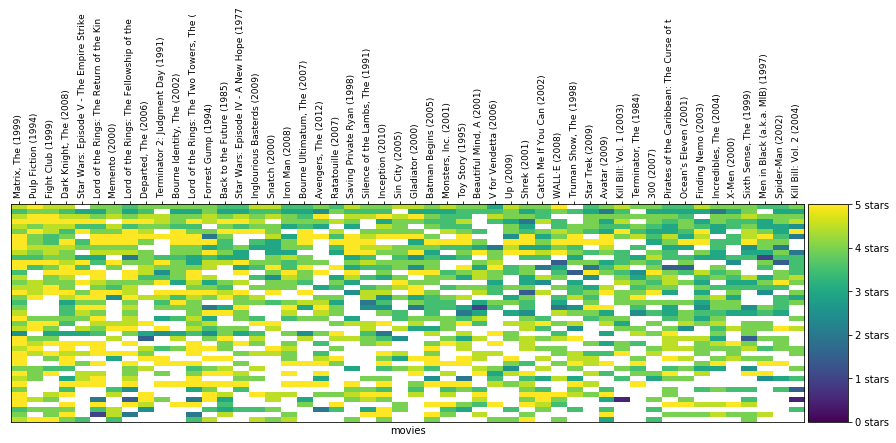

cluster # 5
# of users in cluster: 55. # of users in plot: 55


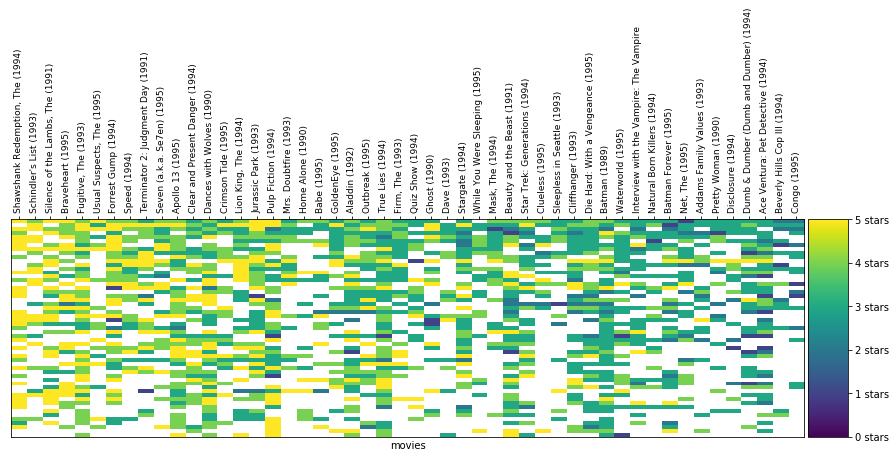

cluster # 3
# of users in cluster: 12. # of users in plot: 12


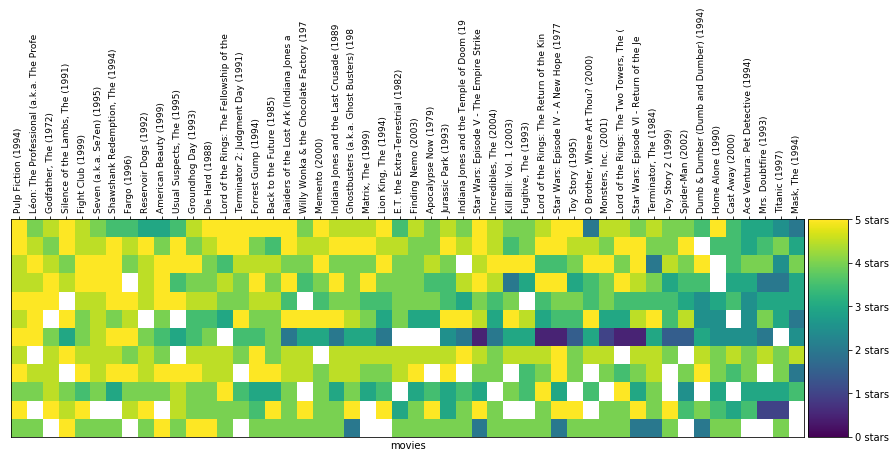

cluster # 1
# of users in cluster: 18. # of users in plot: 18


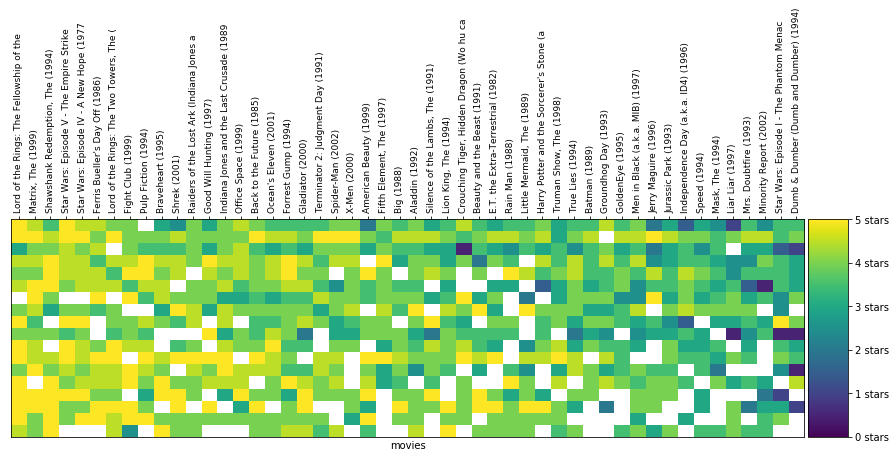

cluster # 7
# of users in cluster: 11. # of users in plot: 11


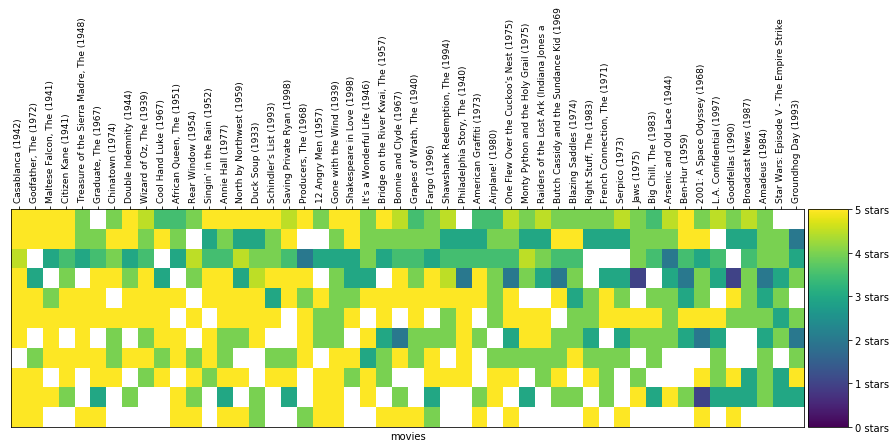

In [39]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

## Prediction

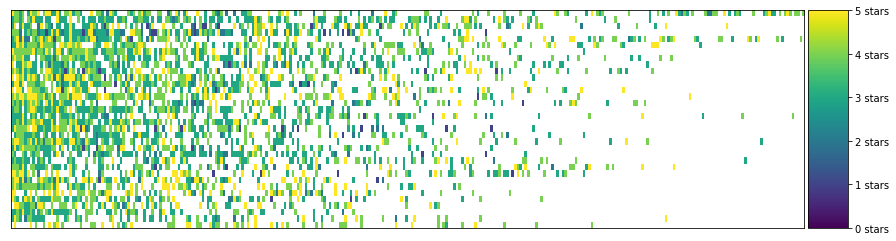

In [40]:
# Pick a cluster ID from the clusters above
cluster_number = 19

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

And the actual ratings in the cluster look like this:

In [41]:
cluster.fillna('').head()

,Dances with Wolves (1990),Pulp Fiction (1994),Forrest Gump (1994),Pretty Woman (1990),"Silence of the Lambs, The (1991)",Batman (1989),Jurassic Park (1993),Apollo 13 (1995),"Fugitive, The (1993)",True Lies (1994),...,"Bone Collector, The (1999)",Alien³ (a.k.a. Alien 3) (1992),"Bug's Life, A (1998)",Remember the Titans (2000),Lethal Weapon 3 (1992),Mr. Smith Goes to Washington (1939),Jerry Maguire (1996),Antz (1998),"Femme Nikita, La (Nikita) (1990)",Rounders (1998)
24,5,4,4,3,4,,3,5,4,4,...,4,,4,5,4,,4,4,,4
26,3,4,4,3,4,,4,3,5,3,...,,,,,,,,,,
4,3,5,,3,5,3,3,4,,,...,,,,,,,,,,
5,4,4,4,2,,3,4,3,4,4,...,,,,,,,,,,
16,3,4,5,2,5,2,2,,4,3,...,,3,,,,,,,4,


In [42]:
# Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
# Pick a movie from the table above since we're looking at a subset
movie_name = 'Star Wars: Episode IV - A New Hope (1977)'

cluster[movie_name].mean()

4.583333333333333

## Recommendation

In [43]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Dances with Wolves (1990)             3.838710
Pulp Fiction (1994)                   4.258065
Forrest Gump (1994)                   4.100000
Pretty Woman (1990)                   3.433333
Silence of the Lambs, The (1991)      4.517241
Batman (1989)                         3.172414
Jurassic Park (1993)                  3.896552
Apollo 13 (1995)                      4.137931
Fugitive, The (1993)                  3.965517
True Lies (1994)                      3.642857
Firm, The (1993)                      3.392857
Four Weddings and a Funeral (1994)    3.777778
Die Hard: With a Vengeance (1995)     3.555556
Lion King, The (1994)                 3.740741
Aladdin (1992)                        3.592593
Terminator 2: Judgment Day (1991)     4.185185
Batman Forever (1995)                 3.000000
Braveheart (1995)                     4.307692
Mrs. Doubtfire (1993)                 3.769231
Ace Ventura: Pet Detective (1994)     3.440000
dtype: float64

In [44]:
# Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 16

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

Wallace & Gromit: The Wrong Trousers (1993)                                    5.000000
Titanic (1997)                                                                 5.000000
Remember the Titans (2000)                                                     5.000000
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    5.000000
Striptease (1996)                                                              5.000000
Secrets & Lies (1996)                                                          5.000000
Green Mile, The (1999)                                                         5.000000
Armageddon (1998)                                                              5.000000
Fargo (1996)                                                                   4.642857
Scream (1996)                                                                  4.500000
Welcome to the Dollhouse (1995)                                                4.500000
Beavis and Butt-Head Do America 